In [4]:
import pandas as pd
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords
from string import punctuation
import matplotlib.pyplot as plt
import sqlite3


In [2]:
sw_pt = stopwords.words('portuguese')


In [3]:
df_pedidos_txt = pd.read_pickle('dados/pedidos_texto.pkl')
df_pedidos_txt.head()


,IdPedido,ProtocoloPedido,Esfera,OrgaoDestinatario,Situacao,DataRegistro,ResumoSolicitacao,DetalhamentoSolicitacao,PrazoAtendimento,FoiProrrogado,...,OrigemSolicitacao,IdSolicitante,AssuntoPedido,SubAssuntoPedido,Tag,DataResposta,Resposta,Decisao,EspecificacaoDecisao,AnoRegistro
0,1678719,99901000001201633,Federal,BB – Banco do Brasil S.A.,Concluída,2016-01-01,consultar meu cpf . no spc e serasa,Consulta do cpf no serasa e spc,2016-01-25,Não,...,Internet,2625397,Outros em Economia e Finanças,,,2016-01-25,"Prezado(a) Sr(a). Gisela, Encaminhamos, em an...",Acesso Concedido,Resposta solicitada inserida no Fala.Br,2016
1,1678723,99902000001201623,Federal,CEF – Caixa Econômica Federal,Concluída,2016-01-01,Esclarecimentos sobre seguro de risco de incêndio,Sou conselheiro de um Condomínio e depois da p...,2016-01-25,Não,...,Internet,2571729,Outros em Economia e Finanças,,,2016-01-05,"Prezado (a) Senhor (a), 1. Em atenção a su...",Acesso Negado,Pedido incompreensível,2016
2,1678726,99901000002201688,Federal,BB – Banco do Brasil S.A.,Concluída,2016-01-01,SALDO PASEP,"Bom dia, necessito do saldo do PASEP",2016-01-25,Não,...,Internet,2117083,Outros em Economia e Finanças,,,2016-01-25,"Prezado(a) Sr(a). Regina, Encaminhamos, em an...",Acesso Concedido,Resposta solicitada inserida no Fala.Br,2016
3,1678739,80200000001201611,Federal,MTur - Ministério do Turismo,Concluída,2016-01-01,cópia termo de convenio em MCIDADES e prefeitu...,Solicito cópia dos termos de convenio nº siafi...,2016-01-25,Não,...,Internet,47991,Turismo,,,2016-01-05,Segue resposta da área técnica Retransmitimo...,Acesso Concedido,Resposta solicitada inserida no Fala.Br,2016
4,1678747,80200000002201657,Federal,MDR - Ministério do Desenvolvimento Regional,Concluída,2016-01-01,cópia termo de convenio em MCIDADES e prefeitu...,Solicito copia do termo de convenio nº siafi 5...,2016-01-25,Não,...,Internet,47991,Infraestrutura Urbana,,,2016-01-04,"Prezado Sr. Maxoel, Por essa demanda se trata...",Pergunta Duplicada/Repetida,,2016


In [5]:
df_pedidos_txt.columns

Index(['IdPedido', 'ProtocoloPedido', 'Esfera', 'OrgaoDestinatario',
       'Situacao', 'DataRegistro', 'ResumoSolicitacao',
       'DetalhamentoSolicitacao', 'PrazoAtendimento', 'FoiProrrogado',
       'FoiReencaminhado', 'FormaResposta', 'OrigemSolicitacao',
       'IdSolicitante', 'AssuntoPedido', 'SubAssuntoPedido', 'Tag',
       'DataResposta', 'Resposta', 'Decisao', 'EspecificacaoDecisao',
       'AnoRegistro'],
      dtype='object')

In [ ]:
conn = sqlite3.connect('avaliacao_textos')

In [4]:
df_pedidos_txt['Decisao'].value_counts()


Acesso Concedido                                            498842
Não se trata de solicitação de informação                    59701
Acesso Negado                                                46512
Acesso Parcialmente Concedido                                35270
Informação Inexistente                                       24924
Órgão não tem competência para responder sobre o assunto     22292
Pergunta Duplicada/Repetida                                  15462
                                                                 1
Name: Decisao, dtype: int64

In [6]:
df_pedidos_txt.groupby('Decisao')['EspecificacaoDecisao'].value_counts()


Decisao                                                   EspecificacaoDecisao                                                                            
                                                                                                                                                                   1
Acesso Concedido                                          Resposta solicitada inserida no Fala.Br                                                             388866
                                                          Orientação sobre como encontrar a informação solicitada na Internet ou em publicações existentes     66352
                                                          Informações enviadas por e-mail                                                                      31091
                                                          Concedido acesso a sistema corporativo para consulta da informação                                    6204
                    

In [14]:
words = ""
for sol in df_pedidos_txt.query("AnoRegistro == 2015 and Decisao == 'Acesso Negado'")['Resposta']:
    aux = ""
    word = ""
    for c in sol:
        if c not in punctuation and c != ' ':
            word += c
            
        if c == ' ':
            if word.strip().lower() not in sw_pt and word.strip() != '':
                words += word.lower() + ' '
            word = ""

len(words)

4508209

In [15]:
wordcloud = WordCloud().generate(words)

(-0.5, 399.5, 199.5, -0.5)

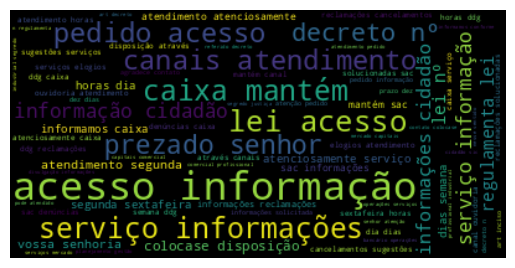

In [16]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


In [ ]:
sw_pt.extend(['gostaria', 'boa', 'bom', 'dia', 'tarde', 'agradeço'])


In [ ]:
words = ""
count_words_freq = {}
count_doc_freq = {}
for sol in df.query("ano == 2015")['DetalhamentoSolicitacao']:
    aux = ""
    word = ""
    word_set = []
    for c in sol:
        if c not in punctuation and c != ' ':
            word += c
            
        if c == ' ':
            if word.strip().lower() not in sw_pt and word.strip() != '':
                word = word.lower()
                words += word + ' '
                if word not in count_words_freq:
                    count_words_freq[word] = 1
                else:
                    count_words_freq[word] += 1
                    
                if word not in word_set:
                    if word not in count_doc_freq:
                        count_doc_freq[word] = 1
                    else:
                        count_doc_freq[word] += 1
                    word_set.append(word)
            word = ""
len(words)

In [ ]:
len(count_words_freq)

In [ ]:
wordcloud = WordCloud().generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")